In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

In [ ]:
# Cargar la imagen
imagen = io.imread('photographer.png')  # Cambia la ruta a tu imagen
imagen = imagen[:,:,0:3]
imagen_gray = color.rgb2gray(imagen)  # Convertir a escala de grises

# Aplicar la FFT
fft_imagen = np.fft.fft2(imagen_gray)
fft_imagen_shifted = np.fft.fftshift(fft_imagen)

print(fft_imagen_shifted.shape)
print(fft_imagen_shifted.dtype)

# Obtener la magnitud
magnitud = np.abs(fft_imagen_shifted)
magnitud_log = np.log(1 + magnitud)  # Log para visualizar mejor

(245, 327)
complex128


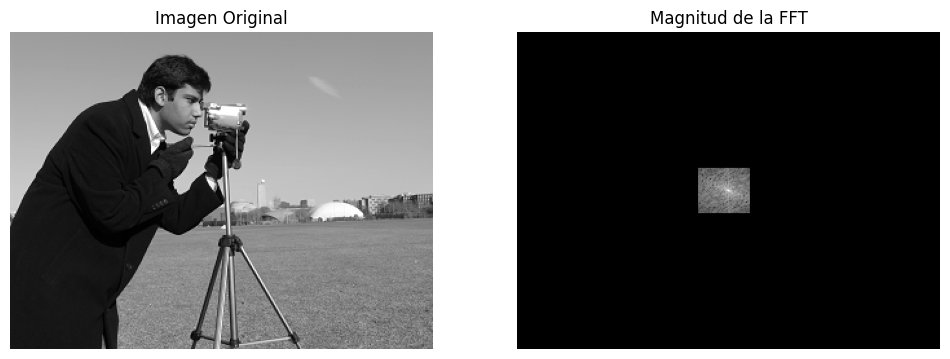

In [ ]:
# Mostrar la imagen original y la magnitud de la FFT
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(imagen_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Magnitud de la FFT')
plt.imshow(magnitud_log, cmap='gray')
plt.axis('off')

plt.show()

(245, 327)
0 1
0 1


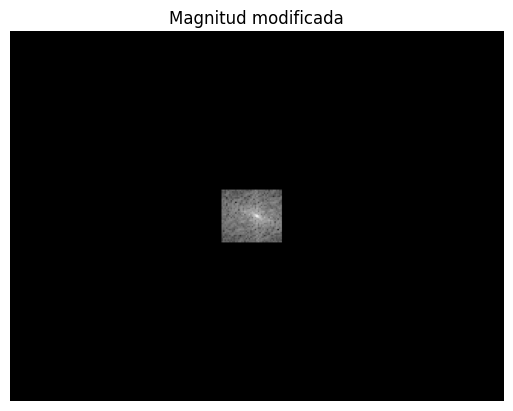

In [ ]:
mascara = np.ones(fft_imagen_shifted.shape, dtype="uint8")
print(mascara.shape)

mascara[105:140, 140:180] = 0
print(np.min(mascara),np.max(mascara))

mascara = 1 - mascara

print(np.min(mascara),np.max(mascara))

fft_imagen_shifted = fft_imagen_shifted * mascara
magnitud = np.abs(fft_imagen_shifted)
magnitud_log = np.log(1 + magnitud)

plt.title('Magnitud modificada')
plt.imshow(magnitud_log, cmap='gray')
plt.axis('off')

plt.show()



In [ ]:
# Aplicar la IFFT
imagen_reconstruida = np.fft.ifft2(np.fft.ifftshift(fft_imagen_shifted)).real

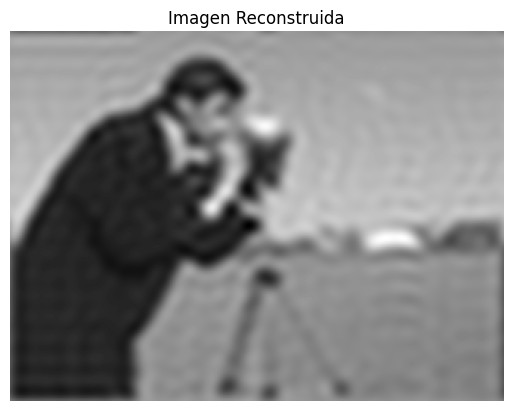

In [ ]:
plt.title('Imagen Reconstruida')
plt.imshow(imagen_reconstruida, cmap='gray')
plt.axis('off')

plt.show()